## This file is for the penultimate development of this 4-Level Model

##### TRAINING SUBSECTION

In [1]:
'''NOTE Load in the training data for level-0 models'''

import _Data_Processing
import joblib
from importlib import reload

'''
this function returns 7 objects:
	data: sets of data as X_train, X_val, X_ind, y_train, y_val, y_ind
	feature_list: list of all feature names with a column index (dict)
'''

reload(_Data_Processing)

lstm_format = False

X, X_train, X_val, X_ind,\
y, y_train, y_val, y_ind,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_large_stoch.csv'
	,indp_size  =		0.01
	,test_size  =		0.20
	,shfl_splt	=		False
	,t_start    =		600
	,t_end		=		800
	,mod_type	=		'Stochastic_Classification'
    #stoch_class format is #classes,#mins-for-range,#mins-in-future
	,target_t	=		'2_60_15'
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,keep_time	=		True
	,optm_data	=		True
    ,indices	=		0
)
joblib.dump(scaler, 'scaler/tmp_sc.joblib')

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 127800164 -> 60475164
loaded chunk 2 of size: 127800164 -> 60475164
loaded chunk 3 of size: 127800164 -> 60475164
loaded chunk 4 of size: 127800164 -> 60475164
loaded chunk 5 of size: 127800164 -> 60475164
loaded chunk 6 of size: 127800164 -> 60475164
loaded chunk 7 of size: 127800164 -> 60475164
loaded chunk 8 of size: 127800164 -> 60475164
loaded chunk 9 of size: 127800164 -> 60475164
loaded chunk 10 of size: 127800164 -> 60475164
loaded chunk 11 of size: 127800164 -> 60375164
loaded chunk 12 of size: 127800164 -> 60475164
loaded chunk 13 of size: 127800164 -> 60475164
loaded chunk 14 of size: 113783060 -> 53842266
concat chunks
concatted chunks
Success.
Size of dataset:	840017266
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success...

# of Samples:	347258

# of Features:	519

Target:		tsc_2_60_15_spx

Trying to split DataFrame into X and y...Success.
Trying to collect all featu

['scaler/tmp_sc.joblib']

In [2]:
'''NOTE Shred the data to run parallel to desired level-0 structure'''

import _Data_Rotating
from importlib import reload
'''
This function returns 4 items.
-	2D array of X partitions, by featurespace and samplespace
-	1D array of index-lists for each featurespace-partition specific features
-	1D array of featurespace-partition specific rotation transformer functions
-	1D array of y partitions for each samplespace partition.
'''

reload(_Data_Rotating)

X_train_parts, X_find_parts, X_trans_parts, y_parts = _Data_Rotating.rotate_partitions(
	X				=	X_train
	,y				=	y_train
	,n_feat_parts	=	1
	,feat_subsets	=	feature_subsets
	,feat_part_type	=	'by_subset'
	,fraction_feats	=	1.0
	,no_feat_overlap=	False
	,feats_for_all	=	[]
	,rotation_type	=	'PCA'
	,rotation_filter=	False
	,filter_type	=	'Retention'
	,filter_value	=	0.95
	,n_sample_parts	=	1
	,smpl_part_type	=	'Even'
	,sample_overlap	=	0.9
	,sample_shuffle	=	False
	,lstm_format	=	lstm_format
)

2025-02-18 20:23:47.002370: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 20:23:47.170322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739928227.255724   20316 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739928227.280619   20316 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 20:23:47.486711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Custom parameters selected.
nn	-	{'optimizer_type': 'Adam', 'optimizer_kwarg': {'learning_rate': 0.0001}, 'time_steps': 5, 'LSTM': False, 'shuffle_train': True, 'epochs': 50, 'rlr_patience': 20, 'batch_size': 8, 'architecture': 'default_shallow'}
Running on: GPU



I0000 00:00:1739928230.267352   20316 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1962 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Training model #1
Running on: GPU

Epoch 1/50


I0000 00:00:1739928232.284410   20509 service.cc:148] XLA service 0x7f0ca4003b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739928232.284758   20509 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-02-18 20:23:52.319629: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739928232.425943   20509 cuda_dnn.cc:529] Loaded cuDNN version 90300


  61/4978 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4467 - loss: 0.7992 - precision: 0.4626 - recall: 0.3883

I0000 00:00:1739928232.821830   20509 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4978/4978 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7773 - loss: 0.4724 - precision: 0.8144 - recall: 0.7703 - val_accuracy: 0.7982 - val_loss: 0.4522 - val_precision: 0.8585 - val_recall: 0.7777 - learning_rate: 1.0000e-04
Epoch 2/50
4978/4978 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8080 - loss: 0.4235 - precision: 0.8430 - recall: 0.8061 - val_accuracy: 0.7770 - val_loss: 0.4807 - val_precision: 0.8618 - val_recall: 0.7297 - learning_rate: 1.0000e-04
Epoch 3/50
4978/4978 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8145 - loss: 0.4067 - precision: 0.8458 - recall: 0.8124 - val_accuracy: 0.7532 - val_loss: 0.5428 - val_precision: 0.8920 - val_recall: 0.6501 - learning_rate: 1.0000e-04
Epoch 4/50
4978/4978 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8254 - loss: 0.3921 - precision: 0.8572 - recall: 0.8221 - val_accuracy: 0.7781 - val_loss: 0.5093 - val_precision: 0.8729 - val_recall: 0.7193 - learning_rate: 1.0000e-04
Epoch 5/50
4978/4978 ━━━━━━━━━━━━━━━━━━━━ 15s 3

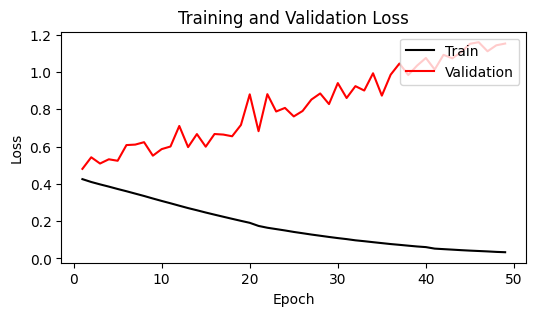

In [3]:
'''NOTE Begin training for each level-0 model'''

import _Modelset_Training
from importlib import reload

'''
Function returns a 3D list of trained models that are fit to the resepective dataset.
	Dim1:	Featurespace, here are the subsetctions/partitions for each unique set of features
	Dim2:	Samplespace, here are the subsetctions/partitions for each unique set of samples
	Dim3:	Modelspace, here are the individual models trained on a unique partition
'''
reload(_Modelset_Training)

models = _Modelset_Training.train_models(
	model_types	=	['nn']
	,data_parts	=	X_train_parts
	,findx_parts=	X_find_parts
	,trans_parts=	X_trans_parts
	,trgt_parts	=	y_parts
	,X_valid	=	X_val
	,y_valid	=	y_val
	,param_mode	=	'custom'
	,cst_mod_prm=	[{
		'optimizer_type'	:	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.0001
			#,'momentum'		:	0.9
            #,'weight_decay'		:	0.0001
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	50
		,'rlr_patience'		:	20
        ,'batch_size'		:	8
		,'architecture'	:	'default_shallow'
		#,'external_cw'	:	_Utility.get_class_weights(y_train)
		}]
	,tnr_verbose=	True
	,lstm_frmt	=	lstm_format
	,use_cls_wt	=	True
    ,pred_type	=	'Classification'
)

In [ ]:
'''NOTE show performances of level-0 Models'''

import _Model_Evaluation
import _Neural_Net

reload(_Model_Evaluation)
reload(_Neural_Net)

_Model_Evaluation.evaluate_models(
		models=models
		,X_findx=X_find_parts
		,X_trans=X_trans_parts
		,X_train=X_train_parts
		,y_train=y_parts
		,X_test=X_val
		,y_test=y_val
		,prfm_gnrl	=	'all'
		,prfm_stat	=	'all'
		,disp_mthd	=	'as_value'
		,test_whch	=	'independent'
		,pred_type	=	'classification'
		,lstm_frmt	=	lstm_format
)

In [ ]:
'''NOTE begin training for level-1 model based off of train level-0 model predictions'''

import _Metamodel
from importlib import reload
import _Utility

reload(_Metamodel)

metamodel, prediction_set = _Metamodel.train_test_meta_model(
	models		=	models
	,X_findx	=	X_find_parts
	,X_trans	=	X_trans_parts
	,X_test		=	X_val
	,y_test		=	y_val
	,val_size	=	0.2
	,shuffle	=	True
	,metam_type =	'NN'
	,use_cls_wt =	True
	,use_mm_params=	True
    ,meta_scaler=	'Standard'
	,metam_params={
		'optimizer_type':	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.00025
            #,'weight_decay'	:	0.001
			#,'momentum':0.9
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	75
		,'batch_size'		:	30
		,'rlr_patience'		:	10
		,'architecture'	:	'default_deep'
		#,'custom_val_data'	:	(X_train, y_train)
		}
)

In [ ]:
'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, _, __,\
y_test, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test2.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import _Master_Model
reload(_Master_Model)
reload(_Utility)
from importlib import reload
from sklearn.svm import SVC
from _Utility import get_class_weights

shallow_master = _Master_Model.Master(
	model_depth		=	2
	,all_models 	=	[models, metamodel]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
	,lvl1_formatters=	[joblib.load('scaler/meta.joblib')]
)

X_blvl2 = X_val
y_blvl2 = y_val

pred_2 = shallow_master.master_predict(X_blvl2, mode='proba')
cm_vals = _Utility.get_cm_values(y_blvl2, pred_2)

_Utility.show_confusion_matrix(y_blvl2,pred_2,title=f'Level-1 Prediction\nPrecision: {round(precision_score(y_blvl2,pred_2)*100, 2)}%')

df = pd.DataFrame(X_blvl2)
df['score'] = cm_vals
df['target'] = y_blvl2
kept_indices = df.index[~(df['score'] % 2 == 0)].tolist()
df = df.drop(df[df['score']%2==0].index).reset_index(drop=True)
df = df.drop(columns=['score']).reset_index(drop=True)
#pd.set_option('display.max_rows',None)
co = df.corr()['target'].drop('target')
#print(co.sort_values())
p = co.nlargest(5).index.tolist()
n = co.nsmallest(5).index.tolist()
feats = p+n

df_pair = pd.DataFrame(X_blvl2)
df_pair = df_pair.iloc[kept_indices].reset_index(drop=True)
df_pair = df_pair.iloc[:, feats]

X_svm = df_pair.values
y_svm = df['target'].values

y_one = y_blvl2[kept_indices]

clf = SVC(kernel='linear',C=1.0,class_weight=_Utility.get_class_weights(y_one)).fit(X_svm, y_svm)

y_svmpred = pred_2#clf.predict(X_svm)
#'polishing' predictions based on if level-1 predicted (1)
for p in range(len(y_svmpred)):
	if(y_svmpred[p] == 1):
		y_svmpred[p] = clf.predict(X[p,feats].reshape(1, -1))

#_Utility.show_confusion_matrix(df['target'],y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y_svm, y_svmpred)*100, 2)}%')
_Utility.show_confusion_matrix(y_blvl2,y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y_blvl2, y_svmpred)*100, 2)}%')


In [ ]:
reload(_Master_Model)
reload(_Utility)
deep_master = _Master_Model.Master(
	model_depth		=	3
	,all_models 	=	[models, metamodel.model, clf]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
    ,lvl2_formatters=	[feats]
)

y_3pred = deep_master.master_predict(X_test)

_Utility.show_confusion_matrix(y_test, y_3pred, title=f'Accuracy: {_Utility.get_accuracy(y_test, y_3pred)}\nPrecision: {_Utility.get_precision(y_test, y_3pred)}')

In [ ]:
import _Master_Model
from importlib import reload
reload(_Master_Model)
#deep_master = _Master_Model.Master(model_depth=3)
#deep_master.load_model('pre63p2-645-800')
deep_master.save_model()

In [ ]:
import _Time_Ensemble
import _Master_Model
import joblib
import _Utility

'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
reload(_Master_Model)
reload(_Time_Ensemble)
lstm_format = False
X_te, _, _, __,\
y_te, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test2.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		600
	,t_end		=		950
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		0
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,keep_time	=		True
    ,indices	=		0
)

chronos_array = _Time_Ensemble.chronos_predict(X_te,                                                           
['pre63p2-645-800','models/m55','models/m60','models/m50'])


In [ ]:
reload(_Utility)
reload(_Time_Ensemble)
print(type(chronos_array[0]))
t_pred	=	_Time_Ensemble.chronos_fusion(master_predictions=chronos_array, fusion_method='mv',vote_var=3)
_Utility.show_confusion_matrix(y_te, t_pred, title=f'Accuracy: {_Utility.get_accuracy(y_te, t_pred)}\nPrecision: {_Utility.get_precision(y_te, t_pred)}')

In [ ]:
#reload(_Utility)
#reload(_Time_Ensemble)
#vals = _Utility.graph_range(_Time_Ensemble.chronos_fusion, kw='vote_var', kw_range=range(0,5), show_graph=False, master_predictions=chronos_array,fusion_method='mv')
#scores = [precision_score(y_te, vals[i]) for i in range(0,5)]
#_Utility.plot_standard_line(scores, range(0,5))

In [ ]:
#from _Utility import get_name_from_fss
#get_name_from_fss(fss=feature_subsets,index=138)

In [ ]:
for fs in feature_subsets:
	print(fs)

In [ ]:
len(t_pred)

In [ ]:
#showing chart of predictions
X_raw, _, _, __,\
y_raw, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test2.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		600
	,t_end		=		950
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		0
	,scaler		=		'None'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,keep_time	=		True
    ,indices	=		0
)

reload(_Utility)
signals = _Utility.show_predictions_chart(X_raw=X_raw,predictions=t_pred, t_start=600, t_end=900
                                , add_chart=[517]
                                , fss=feature_subsets
                                , naked_features=False
                                , signal=80)

In [ ]:
import numpy as np
reload(_Utility)
tpl = _Utility.backtester(
    X_raw=X_raw,
    signals=signals,
    method='time_held',
    value=(0,20),#(0,5,1.5,30),
    fees=None)

print(tpl)

#_Utility.graph_range(function=_Utility.backtester,
#	kw='value',
#	kw_range=[(0, i, 2, 30) for i in range(1,20)],
#    
#		#function specific parameteres
#        method='RR_ratio',
#		X_raw=X_raw,
#        signals=signals,
#        fees=None
#	)